In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.drop('Gender', axis= 1, inplace= True)

In [5]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [7]:
# We should convert the units for better understanding as in india the weight is usually calculated in KG and height in CM

In [8]:
df['WEIGHT'] = df['Weight'] * 0.45359237

In [9]:
df.drop('Weight',axis=1, inplace = True)

In [10]:
df['HEIGHT'] = df['Height'] * 2.54

In [11]:
df.drop('Height', axis = 1 , inplace = True)

In [12]:
df = df[['HEIGHT','WEIGHT']].astype(int)

In [13]:
df.isnull().sum()

HEIGHT    0
WEIGHT    0
dtype: int64

In [14]:
# scatter plot

Text(0, 0.5, 'WEIGHT in KG')

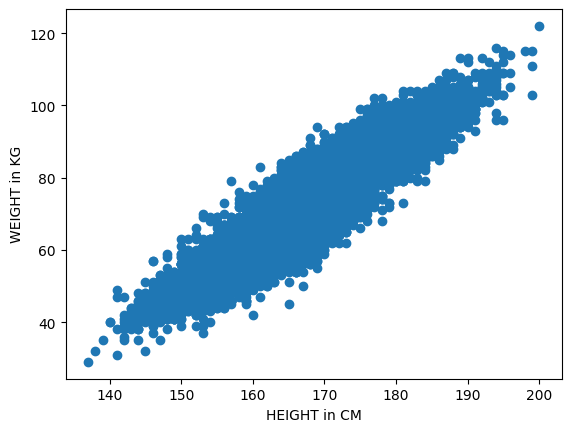

In [15]:
plt.scatter(df['HEIGHT'], df['WEIGHT'])
plt.xlabel('HEIGHT in CM')
plt.ylabel('WEIGHT in KG')

In [16]:
# split the dataset into x and y
x = df[['HEIGHT']]
y = df[['WEIGHT']]

In [17]:
# split the dataset for the training and testing 
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state= 42)

In [19]:
x_train.shape,x_test.shape

((8000, 1), (2000, 1))

In [20]:
# Train the simple linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
reg.coef_

array([[1.37502757]])

In [24]:
reg.intercept_

array([-158.39850837])

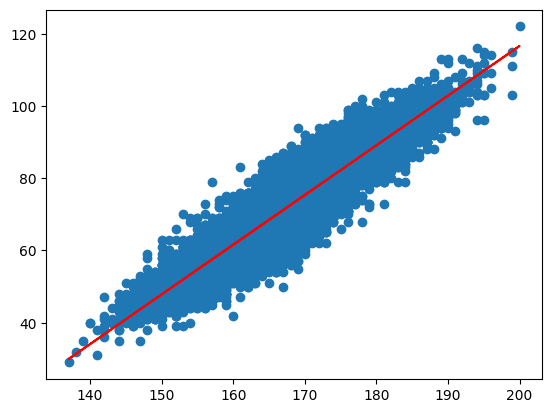

In [25]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),'r')

#### Prediction of train data
    1. Predict height output = intercept + coef * weight 
    2. Y_pred_train = 72.68 + 13.43 * weight


#### Prediction of test data
    1. Predict height output = intercept + coef * weight 
    2. Y_pred_test = 72.68 + 13.43 * x_test

In [26]:
reg.predict([[179]])

C:\Users\Shiva\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[87.73142676]])

In [42]:
def WeightPredcitor(height):
    '''
    Doc: In this function you have to give you height and the model will predict your weight on the basis of your height
    '''
    
    predicted_weight = reg.predict([[height]])  # Predict the weight based on the scaled height
    
    return predicted_weight[0]

In [44]:
WeightPredcitor(187)

C:\Users\Shiva\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([98.73164732])

In [45]:
df.head()

,HEIGHT,WEIGHT
0,187,109
1,174,73
2,188,96
3,182,99
4,177,93


In [46]:
reg.predict([[187]])

C:\Users\Shiva\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[98.73164732]])

In [38]:
reg.score(x_test,y_test) *100

85.62288058964414

In [39]:
df.corr()

,HEIGHT,WEIGHT
HEIGHT,1.000000,0.924101
WEIGHT,0.924101,1.000000


In [40]:
import seaborn as sns

<Axes: >

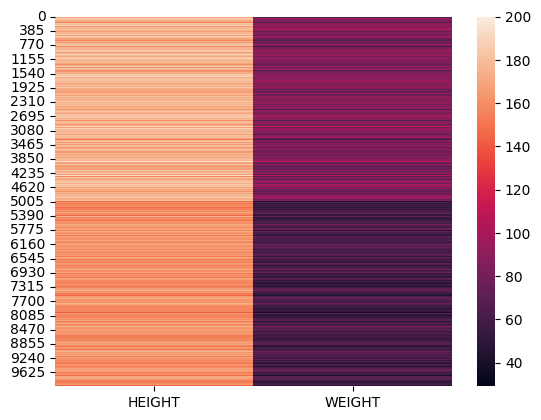

In [41]:
sns.heatmap(df)